<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/Tensorflow_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf

In [6]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [8]:
y_train[0]  # 훈련용 이미지 0번의 숫자

5

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)

In [11]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [12]:
Image.fromarray(x_train2[1])

In [13]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(), # 받은 이미지를 한줄로
    Dense(1, activation='sigmoid'), # 한줄로 받은 이미지 한셀 한셀에 가중치를 더하기
])

In [14]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10) # loss가 줄어들면서 정확도가 높아지고 있음

Epoch 1/10
357/357 [==============================] - 2s 3ms/step - loss: 0.4488 - accuracy: 0.9903 - val_loss: 0.0280 - val_accuracy: 0.9984
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9974 - val_loss: 0.0609 - val_accuracy: 0.9984
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9981 - val_loss: 0.0620 - val_accuracy: 0.9976
Epoch 4/10
357/357 [==============================] - 3s 7ms/step - loss: 0.0636 - accuracy: 0.9984 - val_loss: 0.0098 - val_accuracy: 0.9976
Epoch 5/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9987 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9983 - val_loss: 0.0661 - val_accuracy: 0.9968
Epoch 7/10
357/357 [==============================] - 1s 4ms/step - loss: 0.0315 - accuracy: 0.9990 - val_loss: 0.1181 - val_accuracy: 0.9968
Epoch 

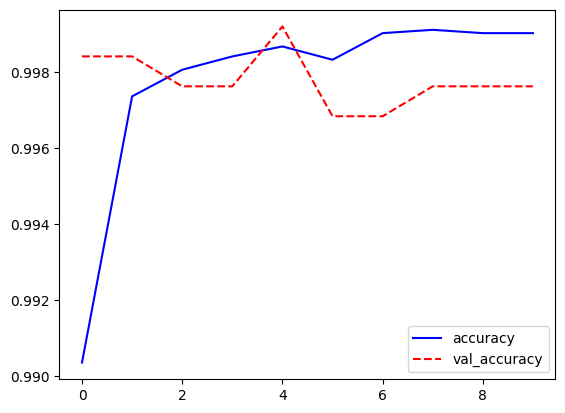

In [15]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

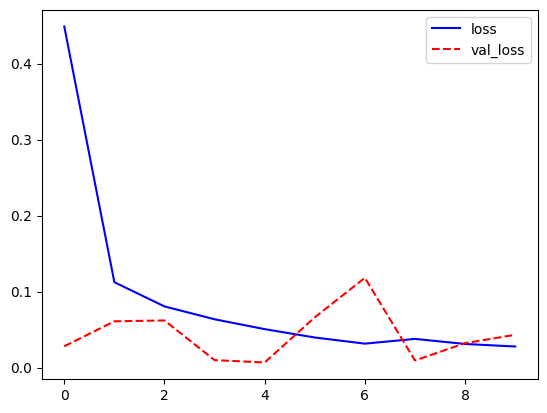

In [16]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

## epochs를 무작정 많이 한다고 정확도가 높아지는 것은 아님!
중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다.

Early Stopping: 100번을 하기로 했어도 성능이 떨어지기 시작하면 일찍 멈춤
Checkpoint: 중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다

복잡도: 얼마나 복잡하냐(모델의 특성)
정확도: 얼마나 잘 맞췄냐(결과)   
 - 단순해야 할 때는 단순하게
 - 복잡해야 할 때는 복잡하게

In [18]:
import tensorflow as tf

In [21]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

In [22]:
x_train[0] # 까망은 0 밝은 부분은 다른 숫자

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1
# 전처리를 해서 -1~+1로 범위 조정
#  0 ~ 255 숫자가 너무 크고 모두 양수
#  -1 ~ +1 숫자도 작고, +,-가 다 있음
# 255 / 127.5 - 1 # 원래 최댓값이 255 -> +1
# 0 / 127.5 - 1  # 원래 최솟값이 0 -> -1

In [24]:
x_train.max()

1.0

In [25]:
x_train.min()

-1.0

In [27]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
  Flatten(),
  Dense(10, activation='softmax')
])

In [28]:
model.compile(
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])

In [29]:
result=model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4522 - accuracy: 0.8651 - val_loss: 0.3006 - val_accuracy: 0.9097
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3401 - accuracy: 0.9011 - val_loss: 0.2903 - val_accuracy: 0.9130
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3244 - accuracy: 0.9071 - val_loss: 0.2518 - val_accuracy: 0.9288
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.9101 - val_loss: 0.2637 - val_accuracy: 0.9238
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.9110 - val_loss: 0.2724 - val_accuracy: 0.9235
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.9128 - val_loss: 0.2791 - val_accuracy: 0.9202
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9140 - val_loss: 0.2678 - val_accuracy:

In [31]:
prob=model.predict(x_test)
prob[0] # 0번 이미지의 확률

313/313 [==============================] - 1s 2ms/step


array([1.26177270e-06, 6.10103764e-13, 3.66524159e-06, 2.84526218e-03,
       7.24650704e-08, 7.81663221e-06, 3.57060410e-12, 9.97129321e-01,
       1.53633823e-06, 1.09193115e-05], dtype=float32)

In [32]:
y_test[0] # 0번 이미지의 실제 레이블

7

In [34]:
y_pred = prob.argmax(axis=1)  # 확률이 가장 높은 레이블 구하기
y_pred # 확률이 제일 높은 레이블들

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test  # 정답

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [39]:
# 이미지 불러오기
from PIL import Image
img = Image.open('./sample_data/hand.png').convert('L')
img

In [47]:
# 이미지를 숫자로 바꾸기
import numpy as np
x = np.array(img)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x.shape

(28, 28)

In [50]:
x = np.expand_dims(x, 0)
x = x / 127.5 - 1 # 전처리

In [53]:
prob=model.predict(x)

1/1 [==============================] - 0s 51ms/step


In [54]:
prob.argmax(axis=1) # 5인데 3으로 인식함;;; 잘못인식한 것 / 3은 인식을 잘

array([3])

In [55]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip # 다운받고
!unzip cats_and_dogs_filtered.zip # 압축풀기

--2023-09-20 02:13:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.211.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  61.3MB/s    in 1.1s    

2023-09-20 02:13:13 (61.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/d

In [56]:
data_dir='cats_and_dogs_filtered'
BATCH_SIZE=32
IMG_SIZE=(224,224)

In [57]:
# 훈련 데이터 로딩
train_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/train',
        shuffle=True,  # 골고루 섞어서 불러와라
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [66]:
# 검증 데이터 로딩
validation_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/validation',
        shuffle=False,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [67]:
model = tf.keras.Sequential([
    Rescaling(scale=1/127.5, offset=-1), # 전처리 scale만큼 곱해주고, offset 더해줌
    Flatten(),
    Dense(1, activation="sigmoid"),  # 이항분류
])

In [68]:
model.compile(
    loss="binary_crossentropy", # 이항분류
    metrics=["accuracy"])
model.fit(train_dataset, validation_data = validation_dataset) # model.fit은 모델 학습
# 지금 모델은 성능이 매우 낮다....

32/32 [==============================] - 5s 145ms/step - loss: 5.1185 - accuracy: 0.7420 - val_loss: 7.8479 - val_accuracy: 0.5800


In [71]:
from tensorflow.keras.models import load_model
tm = load_model('./sample_data/keras_model.h5')

model = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(scale=1/127.5, offset=-1),
    tm
])

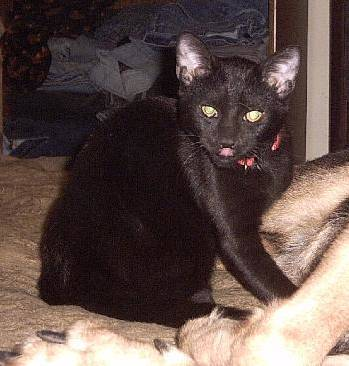

In [77]:
img = Image.open(
'cats_and_dogs_filtered/validation/cats/cat.2005.jpg')
img

In [78]:
a = np.asarray(img) # 에러나면 dtype='float32'로 지정할것
a.shape # 가로 세로 3색(RGB)

(366, 349, 3)

In [79]:
data = np.expand_dims(a, 0)
data.shape  # 그림 장수(1장), 가로, 세로, 3색(RGB)

(1, 366, 349, 3)

In [80]:
# 사진 한 장을 넣었을 때
model.predict(data) # cats , dogs 순서대로 확률이 나옴

1/1 [==============================] - 2s 2s/step


array([[0.9929061 , 0.00709393]], dtype=float32)

In [81]:
# 1000 validation 이미지로 테스트했을때 95% 확률로 맞춤
model.compile(
    loss="sparse_categorical_crossentropy", # 다항분
    metrics=["accuracy"])
model.evaluate(validation_dataset) # [왼쪽을 loss, 오른쪽은 정확도] / model.evaluate 평가 & 테스트

32/32 [==============================] - 18s 491ms/step - loss: 0.2039 - accuracy: 0.9360


[0.20392648875713348, 0.9359999895095825]

장수(데이터) 많이하면 정확도는 거의 항상 올라감

epoch를 너무 많이 하면 떨어질 수도 있음

데이터는 적은데, 논리를 너무 복잡하게 가져가면 예측력 ↓

정치나 경제 관련 해설하는 분들
지나간 일은 기가막히게 설명을 잘함
앞으로 일어날 일은 예측을 못함

이미 깨진 컵이 있음 -> 그거 손 놓으면 어떡하냐?(설명)

유리컵을 공중에 들고 있다가 손을 놓으면?
떨어져서 깨진다 -> 예측

epoch가 적당한지 아닌지는 어떻게 아느냐?
성능을 기준으로 판단

새로운 데이터를 줬을 때
-> 예측을 잘 한다면(적당함)

-> 예측 못함(epoch 너무적거나 많음)

epoch마다 저장을 해뒀다가 가장 성능 좋은 epoch를 불러오면됨